# **Sales Prediction ML model**

# **Load data**

In [1203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/BekBrace/Sales-Forecast-data-csv/main/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# **Data Preparation**

## Check for null values

In [1204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


## Use only store1's data

In [1205]:
df = df[df['store'] == 1]

## Add others_sold, day, month columns

In [1206]:
# convert df['date'] from object to datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# calculate the total_sales_per_day and the others_sold for each day and each item
# total_sales_per_day = df.groupby('date')['sales'].transform('sum')
# df['others_sold'] = total_sales_per_day - df['sales']

# add the day and month columns
df['day'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df

,date,store,item,sales,day,month,year
0,2013-01-01,1,1,13,1,1,2013
1,2013-01-02,1,1,11,2,1,2013
2,2013-01-03,1,1,14,3,1,2013
3,2013-01-04,1,1,13,4,1,2013
4,2013-01-05,1,1,10,5,1,2013
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2,12,2017
912996,2017-12-28,10,50,59,3,12,2017
912997,2017-12-29,10,50,74,4,12,2017
912998,2017-12-30,10,50,62,5,12,2017


### Drop useless columns

In [1207]:
df = df.drop(['store', 'date'], axis=1)
df

,item,sales,day,month,year
0,1,13,1,1,2013
1,1,11,2,1,2013
2,1,14,3,1,2013
3,1,13,4,1,2013
4,1,10,5,1,2013
...,...,...,...,...,...
912995,50,63,2,12,2017
912996,50,59,3,12,2017
912997,50,74,4,12,2017
912998,50,62,5,12,2017


## Group data frames by item

In [1208]:
dfs = {}
for item_id, group_df in df.groupby('item'):
  dfs[item_id] = group_df.drop('item', axis=1)

dfs

{1:        sales  day  month  year
 0         13    1      1  2013
 1         11    2      1  2013
 2         14    3      1  2013
 3         13    4      1  2013
 4         10    5      1  2013
 ...      ...  ...    ...   ...
 18255     19    2     12  2017
 18256     12    3     12  2017
 18257     23    4     12  2017
 18258     26    5     12  2017
 18259     27    6     12  2017
 
 [18260 rows x 4 columns],
 2:        sales  day  month  year
 18260     33    1      1  2013
 18261     43    2      1  2013
 18262     23    3      1  2013
 18263     18    4      1  2013
 18264     34    5      1  2013
 ...      ...  ...    ...   ...
 36515     43    2     12  2017
 36516     35    3     12  2017
 36517     53    4     12  2017
 36518     56    5     12  2017
 36519     60    6     12  2017
 
 [18260 rows x 4 columns],
 3:        sales  day  month  year
 36520     15    1      1  2013
 36521     30    2      1  2013
 36522     14    3      1  2013
 36523     10    4      1  2013
 3652

### Add the sales difference column to all items df

In [1209]:
# for item in dfs:
#   dfs[item]['sales_diff'] = dfs[item]['sales'].diff()
#   dfs[item] = dfs[item].dropna()

# dfs

## Data Separation as X and Y

In [1210]:
y = {}
for item_id in dfs:
  y[item_id] = dfs[item_id]['sales']

y

{1: 0        13
 1        11
 2        14
 3        13
 4        10
          ..
 18255    19
 18256    12
 18257    23
 18258    26
 18259    27
 Name: sales, Length: 18260, dtype: int64,
 2: 18260    33
 18261    43
 18262    23
 18263    18
 18264    34
          ..
 36515    43
 36516    35
 36517    53
 36518    56
 36519    60
 Name: sales, Length: 18260, dtype: int64,
 3: 36520    15
 36521    30
 36522    14
 36523    10
 36524    23
          ..
 54775    32
 54776    33
 54777    39
 54778    34
 54779    39
 Name: sales, Length: 18260, dtype: int64,
 4: 54780    10
 54781    11
 54782     8
 54783    19
 54784    12
          ..
 73035    16
 73036    29
 73037    22
 73038    15
 73039    35
 Name: sales, Length: 18260, dtype: int64,
 5: 73040    11
 73041     6
 73042     8
 73043     9
 73044     8
          ..
 91295    19
 91296    14
 91297    20
 91298    21
 91299    20
 Name: sales, Length: 18260, dtype: int64,
 6: 91300     31
 91301     36
 91302     18
 91303    

In [1211]:
X = {}
for item_id in dfs:
  X[item_id] = dfs[item_id].drop('sales', axis=1)

X

{1:        day  month  year
 0        1      1  2013
 1        2      1  2013
 2        3      1  2013
 3        4      1  2013
 4        5      1  2013
 ...    ...    ...   ...
 18255    2     12  2017
 18256    3     12  2017
 18257    4     12  2017
 18258    5     12  2017
 18259    6     12  2017
 
 [18260 rows x 3 columns],
 2:        day  month  year
 18260    1      1  2013
 18261    2      1  2013
 18262    3      1  2013
 18263    4      1  2013
 18264    5      1  2013
 ...    ...    ...   ...
 36515    2     12  2017
 36516    3     12  2017
 36517    4     12  2017
 36518    5     12  2017
 36519    6     12  2017
 
 [18260 rows x 3 columns],
 3:        day  month  year
 36520    1      1  2013
 36521    2      1  2013
 36522    3      1  2013
 36523    4      1  2013
 36524    5      1  2013
 ...    ...    ...   ...
 54775    2     12  2017
 54776    3     12  2017
 54777    4     12  2017
 54778    5     12  2017
 54779    6     12  2017
 
 [18260 rows x 3 columns],
 4: 

## Data Splitting

In [1212]:
from sklearn.model_selection import train_test_split

train_test_df_list = []
for item in X:
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
  train_test_df_list.append(train_test_split(X[item], y[item], test_size=0.2, random_state=100))


train_test_df_list

[[       day  month  year
  10334    1      4  2016
  11155    4      7  2013
  3587     5     10  2017
  10042    3      7  2015
  14115    4      8  2016
  ...    ...    ...   ...
  16304    3      8  2017
  79       3      3  2013
  12119    2      3  2016
  14147    1      9  2016
  5640     2      6  2013
  
  [14608 rows x 3 columns],
         day  month  year
  5126     5      1  2017
  4777     6      1  2016
  18010    2      4  2017
  9752     0      9  2014
  13947    4      3  2016
  ...    ...    ...   ...
  17237    6      3  2015
  13892    5      1  2016
  12717    5     10  2017
  13332    5      7  2014
  4465     2      3  2015
  
  [3652 rows x 3 columns],
  10334    20
  11155    14
  3587     34
  10042    21
  14115    47
           ..
  16304    26
  79       17
  12119    11
  14147    27
  5640     23
  Name: sales, Length: 14608, dtype: int64,
  5126     20
  4777     20
  18010    30
  9752     18
  13947    23
           ..
  17237    28
  13892    22
  127

# **Model Building**

## **Linear Regression**

### **Training the model**

In [1213]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# lr = RandomForestRegressor(max_depth=2, random_state=100)
lr_models_list = []
for items_dataset in train_test_df_list:
  lr = RandomForestRegressor(max_depth=5, random_state=100)
  # lr = LinearRegression()
  # lr = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, activation='relu', solver='adam', random_state=1)
  lr.fit(items_dataset[0], items_dataset[2])
  lr_models_list.append(lr)

### **Applying the model to make a prediction**

In [1214]:
y_lr_train_pred_list = []
y_lr_test_pred_list = []

for model, df in zip(lr_models_list, train_test_df_list):
  y_lr_train_pred_list.append(model.predict(df[0]))
  y_lr_test_pred_list.append(model.predict(df[1]))

# y_lr_train_pred = lr.predict(X_train)
# y_lr_test_pred = lr.predict(X_test)

### **Evaluate model performance**

In [1215]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse_list = []
lr_train_r2_list = []
lr_test_mse_list = []
lr_test_r2_list = []

for pred, df in zip(y_lr_train_pred_list, train_test_df_list):
  lr_train_mse_list.append(mean_squared_error(df[2], pred))
  lr_train_r2_list.append(r2_score(df[2], pred))

for pred, df in zip(y_lr_test_pred_list, train_test_df_list):
  lr_test_mse_list.append(mean_squared_error(df[3], pred))
  lr_test_r2_list.append(r2_score(df[3], pred))


# lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
# lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
# lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [1216]:
lr_results = pd.DataFrame([[item_id for item_id in dfs], lr_train_mse_list, lr_train_r2_list, lr_test_mse_list, lr_test_r2_list]).transpose()
lr_results.columns = ['Item id', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
lr_results['Item id'] = lr_results['Item id'].astype(int)
lr_results

,Item id,Training MSE,Training R2,Testing MSE,Testing R2
0,1,45.557425,0.369685,44.911594,0.353632
1,2,223.544715,0.448122,228.060686,0.427393
2,3,101.529041,0.416202,106.165131,0.385561
3,4,44.578577,0.373470,45.192511,0.340158
4,5,34.194810,0.357838,34.703303,0.318049
5,6,223.845481,0.452652,227.141373,0.430959
6,7,224.429348,0.452321,226.405403,0.419562
7,8,365.675689,0.467116,377.827686,0.435232
8,9,179.023398,0.438408,181.485001,0.409194
9,10,329.804872,0.466916,341.844362,0.436107


Which item do you want to visualize: 5
r2 score:  0.4309592780861816


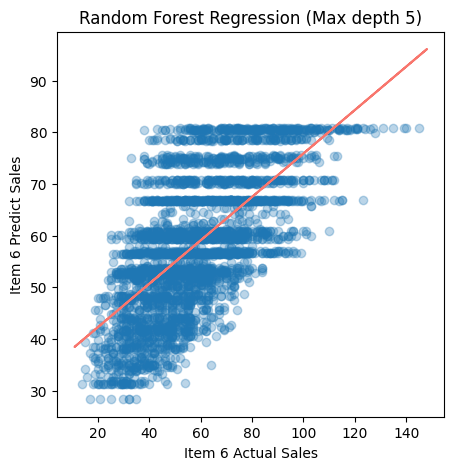

In [1217]:
item_to_vis = int(input("Which item do you want to visualize: "))

plt.figure(figsize=(5,5))
plt.scatter(x=train_test_df_list[item_to_vis][3], y=y_lr_test_pred_list[item_to_vis], alpha=0.3)

z = np.polyfit(train_test_df_list[item_to_vis][3], y_lr_test_pred_list[item_to_vis], 1)
p = np.poly1d(z)

plt.plot(train_test_df_list[item_to_vis][2], p(train_test_df_list[item_to_vis][2]), '#F8766D')
plt.title("Random Forest Regression (Max depth 5)")
plt.ylabel(f'Item {item_to_vis + 1} Predict Sales')
plt.xlabel(f'Item {item_to_vis + 1} Actual Sales')
print('r2 score: ', lr_test_r2_list[item_to_vis])